In [ ]:
"""
1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology
2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!
3.) Look further into correlatino of two stocks 
and see if that gives you any insight into future possible stock prices.
"""

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data, wb
# For time stamps
from datetime import datetime
tech_list = ['TSLA','BMW.DE','AAPL']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    globals()[stock] = data.DataReader(stock,'yahoo',start,end) 
closing_df = data.DataReader(['TSLA','BMW.DE','AAPL'],'yahoo',start,end)['Adj Close']
rets=closing_df.pct_change()
stats=rets.dropna()

In [2]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,455.897716,431.993583,444.814064,445.112396,5.828362e+07,445.112396
std,232.607149,222.449028,228.265267,228.144058,3.163521e+07,228.144058
min,98.851997,89.279999,96.206001,90.893997,1.515770e+07,90.893997
25%,240.966503,231.864998,237.372005,237.280495,3.421258e+07,237.280495
50%,430.199997,410.289993,421.355011,421.090012,4.968475e+07,421.090012
75%,657.627487,619.125000,644.110016,646.949982,7.815450e+07,646.949982
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


<AxesSubplot:xlabel='Date'>

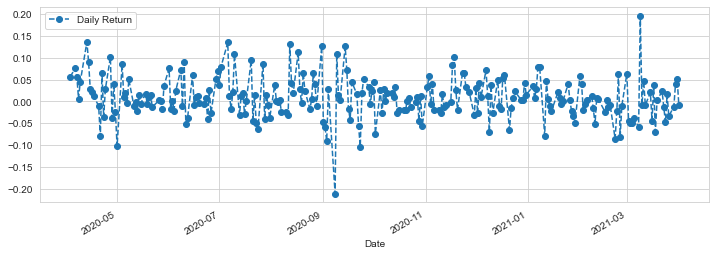

In [3]:
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
TSLA['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

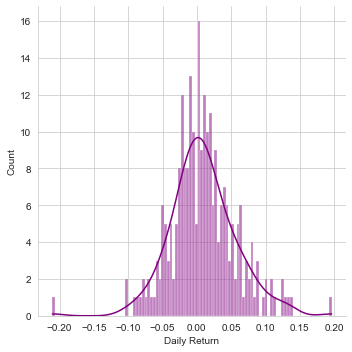

In [4]:
#(1)+(2)bootstrap method
sns.displot(TSLA['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [5]:
stats['TSLA'].quantile(0.05)
#comment: the TSLA stock price will have 5% chance to drop 6.1%

-0.05945847584927255

In [6]:
#(1)+(2) Monte Carlo Methods
days = 365
dt = 1/days
mu = stats.mean()['TSLA']         #######considering the percentage change
sigma = stats.std()['TSLA']

In [7]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))       
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

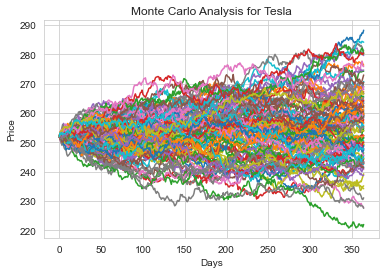

In [8]:
start_price = 252

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

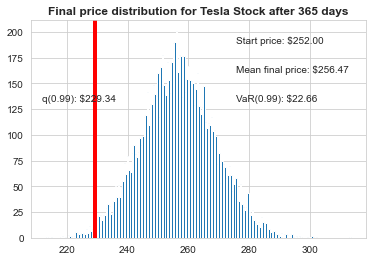

In [9]:
# Set a large numebr of runs
runs = 10000
# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)
# to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]; #(?)

# define q as the 1% empirical qunatile, 99% of the values should fall between here
q = np.percentile(simulations, 1)
# Now plot the distribution of the end prices
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold');

In [10]:
#Comment: there are 99% that we will not lose $21.83 per stock after 365 days

In [11]:
#(3) TSLA vs BMW.DE (comparing with TSLA vs AAPL)

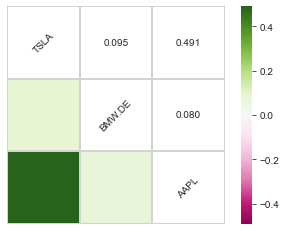

In [12]:
corr = stats.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap="PiYG", vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

In [ ]:
#Comment: TSLA have very low correlation of ~0.1 while comparing with AAPL ~0.5